<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Proyecto_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

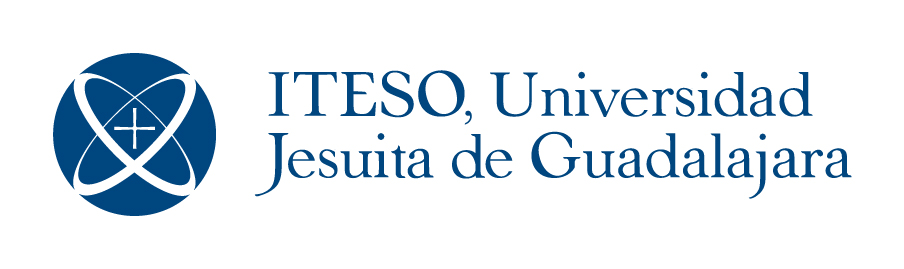

# **SERIES DE TIEMPO**

**Michelle Alejandra Gómez López**  
           
 Fecha: 4 de Septiembre de 2024

 Semestre : Otoño 2024

***Índice***


*   *Introducción*
*   *Objetivo*
*   *Definición del problema*
*   *Descarga y preparación de datos*
*   *Análisis exploratorio*
*   *Estimación a criterio*  
*   *Transformaciones y ajustes*
*   *Modelo*
*   *Evaluación*
*   *Comparación de modelos*
*   *Pronósticos*
*   *Conclusión*
*   *Referencias*

















***Introducción***

Una **serie de tiempo** es una secuencia de datos u observaciones medidos en determinados momentos, en intervalos iguales o desiguales, y ordenados cronológicamente.

  El **análisis de series de tiempo** se refiere al proceso de analizar los datos disponibles para descubrir el patrón o la tendencia en los datos. Permite extraer y modelar las relaciones entre datos a lo largo del tiempo, sea extrapolando (hacia futuro) o interpolando (hacia el pasado) el comportamiento de datos no observados.



Rojas-Jimenez, K. (s. f.). Capítulo 8 Análisis de Series de Tiempo | Ciencia de Datos para Ciencias Naturales. https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html#escogencia-y-ajuste-del-modelo
______________________________________________

***Descripción del Gas Natural (NG=F)***






***Define que pronosticar***




***Por que es importante analizar y pronosticar en el contexto social***





***Relevancia con México***




_________________________________

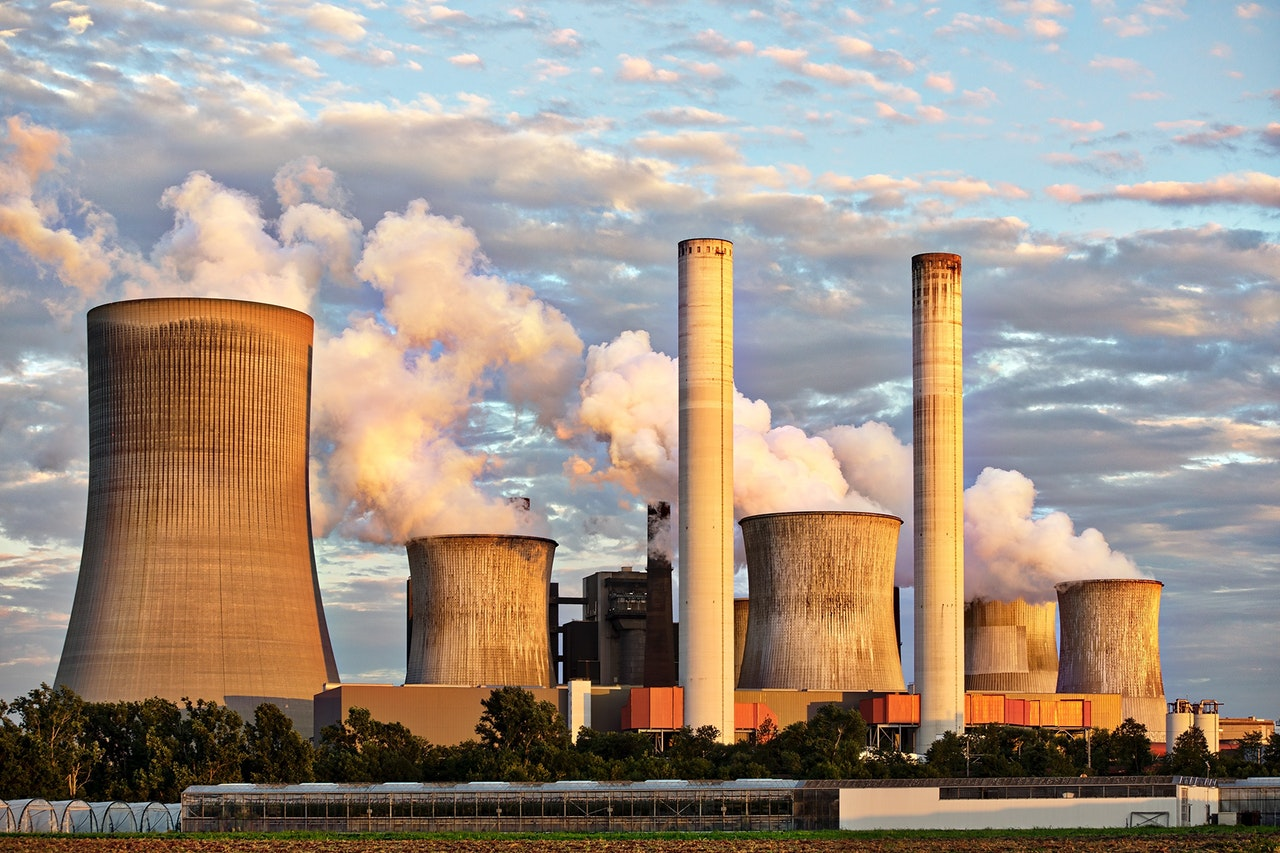

## **Natural Gas**

*Descarga y preparación de datos*
_________________________________


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [12]:
dataG = 'NG=F'
ticker = yf.Ticker(dataG)
hist = ticker.history(start= '2011-01-01', end= '2023-12-01', interval='1mo')['Close']
hist.index = hist.index.strftime('%Y-%m-%d')
hist.index = pd.to_datetime(hist.index)

hist

,Close
Date,
2011-01-01,4.420
2011-02-01,4.037
2011-03-01,4.389
2011-04-01,4.698
2011-06-01,4.374
...,...
2023-06-01,2.798
2023-07-01,2.634
2023-08-01,2.768


In [13]:
hist = hist.groupby(pd.Grouper(freq='M')).last()
hist = pd.Series(hist.values, index = pd.date_range(start=hist.index[0], end=hist.index[-1], freq='1M'))
hist

<ipython-input-13-4341ccfd4781>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hist = hist.groupby(pd.Grouper(freq='M')).last()
<ipython-input-13-4341ccfd4781>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hist = pd.Series(hist.values, index = pd.date_range(start=hist.index[0], end=hist.index[-1], freq='1M'))


,0
2011-01-31,4.420
2011-02-28,4.037
2011-03-31,4.389
2011-04-30,4.698
2011-05-31,NaN
...,...
2023-07-31,2.634
2023-08-31,2.768
2023-09-30,2.929
2023-10-31,NaN


In [14]:
type(hist)

pandas.core.series.Series

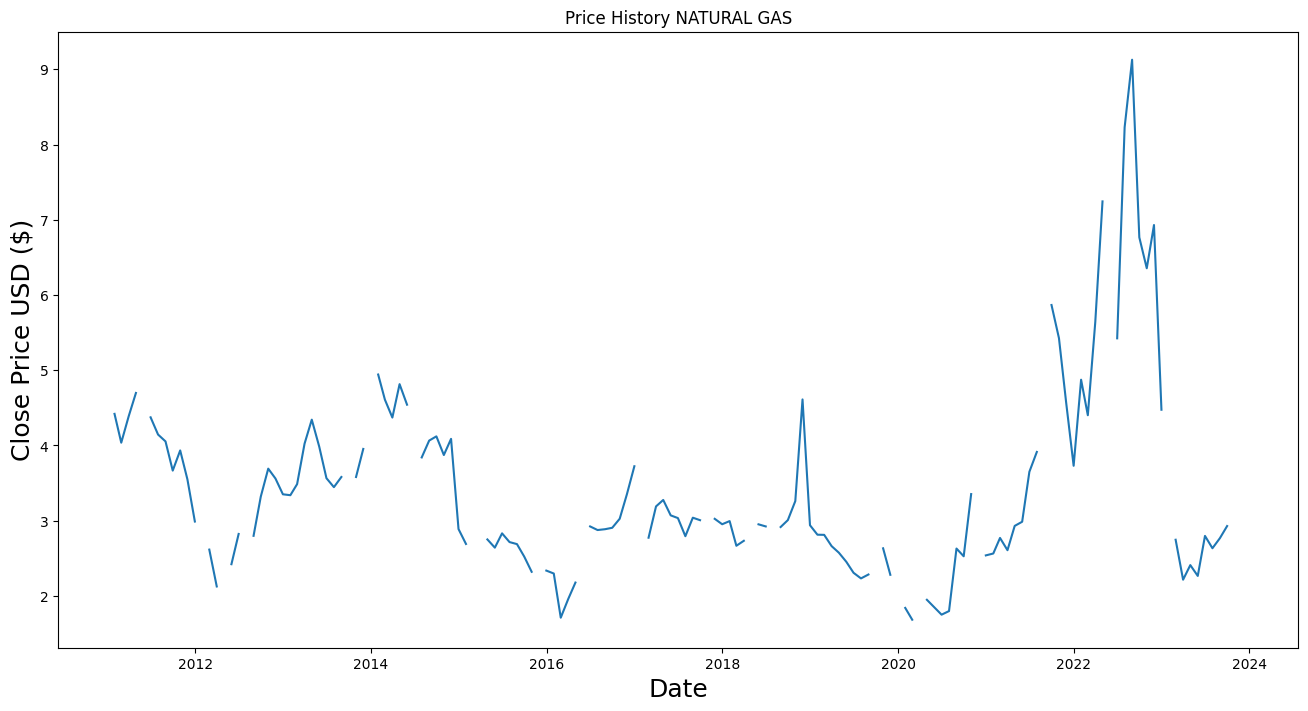

In [15]:
plt.figure(figsize=(16,8))
plt.title('Price History NATURAL GAS')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
hist.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', length=155, freq='ME')

In [17]:
hist.head()

,0
2011-01-31,4.420
2011-02-28,4.037
2011-03-31,4.389
2011-04-30,4.698
2011-05-31,NaN


Al separar los datos entre entrenamiento y prueba se puede:

• **Evaluar la generalización:** Permite evaluar cómo se desempeña el modelo en datos no vistos, lo que ayuda a medir su capacidad de generalización.

• **Prevenir el sobreajuste:** Ayuda a identificar si el modelo está sobreajustado a los datos de entrenamiento, lo cual podría llevar a un mal rendimiento en datos reales.

• **Optimizar el modelo:** Permite ajustar los hiperparámetros y realizar selecciones de características de manera más efectiva

In [18]:
training_mask = hist.index > '2024-01-01'
test = hist[training_mask]
train = hist[~training_mask]

Text(0.5, 1.0, 'Gas Natural 2012-2024')

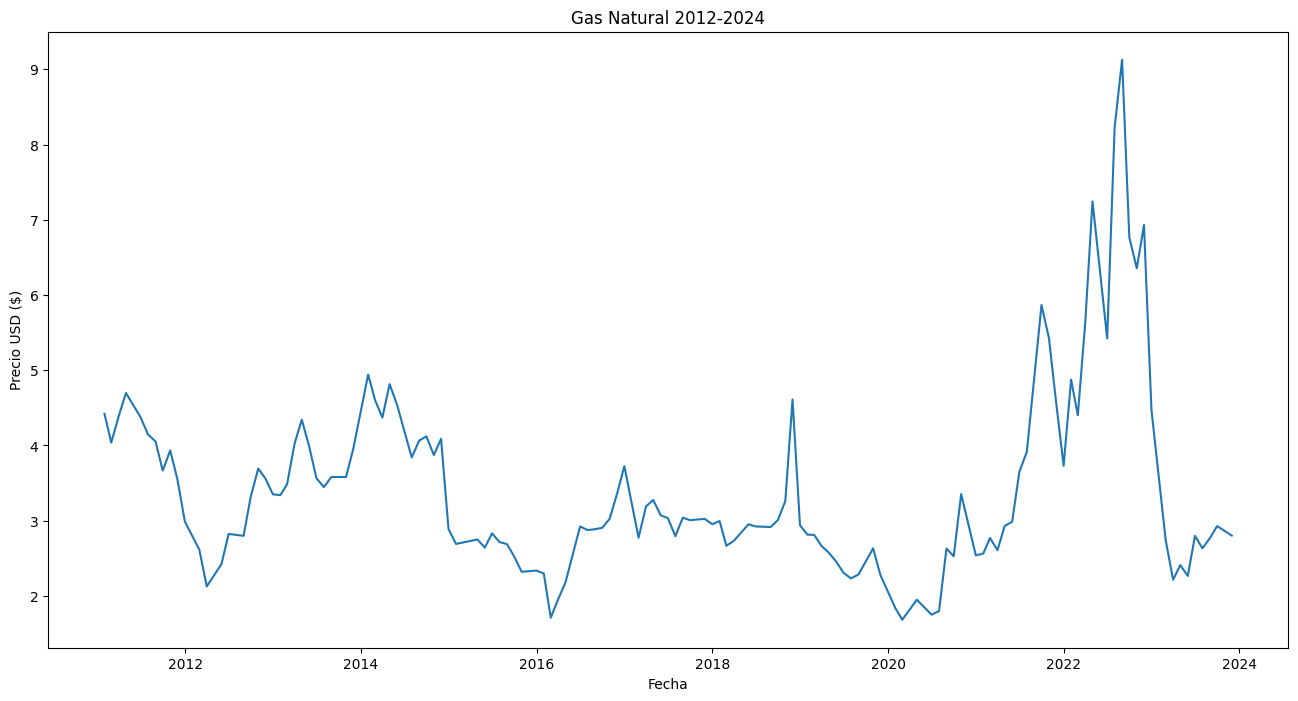

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(data = hist)
plt.ylabel("Precio USD ($)")
plt.xlabel("Fecha")
plt.title("Gas Natural 2012-2024")


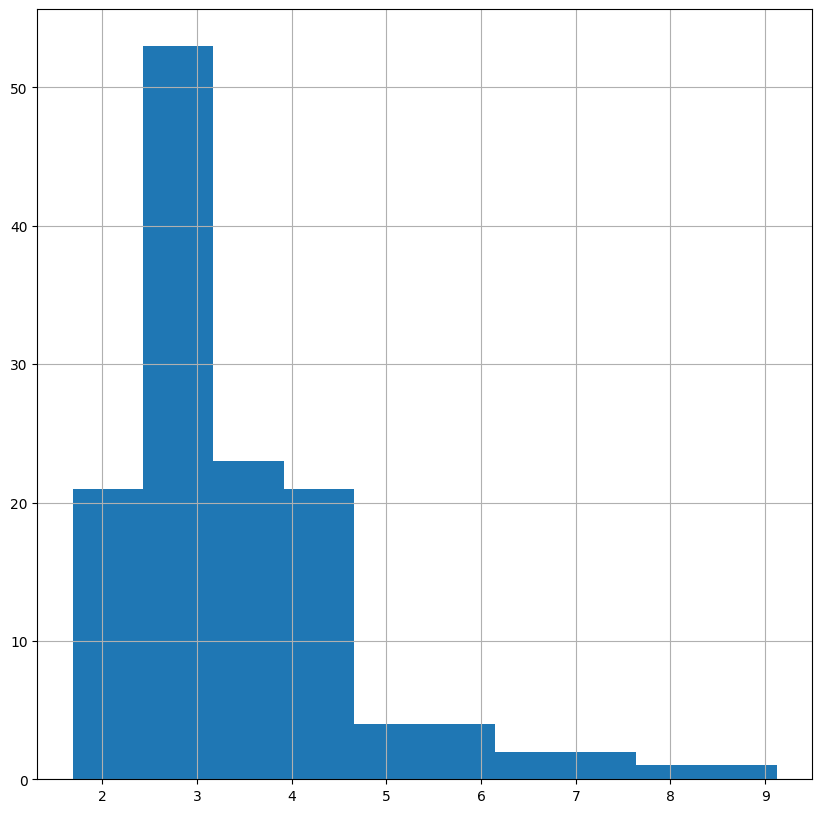

In [20]:
hist.hist(figsize=(10, 10))
plt.show()

<Axes: ylabel='Density'>

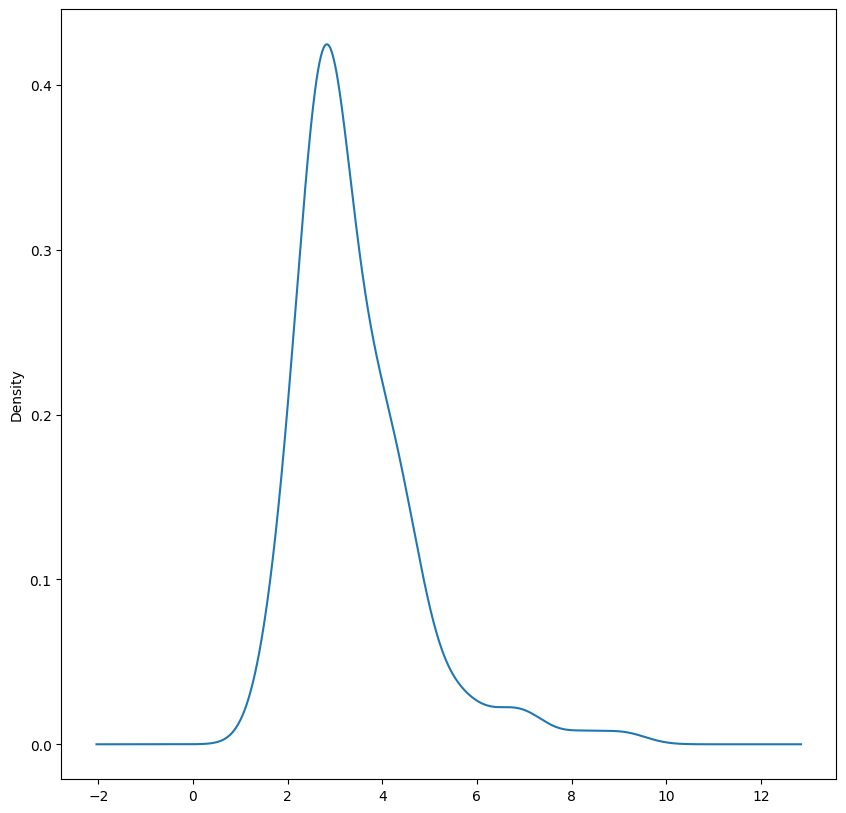

In [21]:
plt.figure(figsize=(10,10))
hist.plot.density()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot


In [23]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

# Calculate the correct shape based on unique years and months
num_years = len(pd.unique(piv_index))
num_months = len(pd.unique(piv_season))

# Calculate the expected size of the reshaped array
expected_size = num_years * num_months

# Truncate or pad the data to match the expected size
if len(hist) < expected_size:
    # Pad with NaN if data is shorter than expected
    padding_size = expected_size - len(hist)
    padding = np.full((padding_size, hist.shape[1]), np.nan)
    data_to_reshape = np.concatenate([hist.values, padding])
elif len(hist) > expected_size:
    # Truncate if data is longer than expected
    data_to_reshape = hist.values[:expected_size]
else:
    data_to_reshape = hist.values

# Reshape the data using the calculated shape
reshaped_data = np.reshape(data_to_reshape, (num_years, num_months))

piv = pd.DataFrame(index=pd.unique(piv_index), columns=pd.unique(piv_season), data=reshaped_data)
piv.plot(figsize=(12, 8))
plt.legend(pd.unique(piv_season))

IndexError: tuple index out of range

In [24]:
piv.head()

NameError: name 'piv' is not defined

In [25]:
piv.shape

NameError: name 'piv' is not defined

In [26]:

piv.boxplot()
plt.xticks([])


NameError: name 'piv' is not defined

In [27]:
piv = pd.pivot_table(hist, index=piv_season, columns=piv_index)
piv.plot(figsize=(12,8), legend = False)

AttributeError: 'Series' object has no attribute 'columns'

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


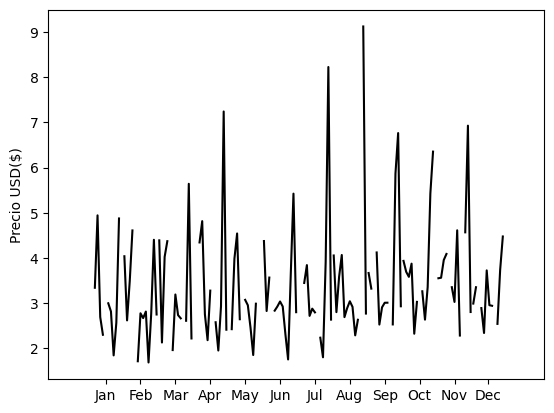

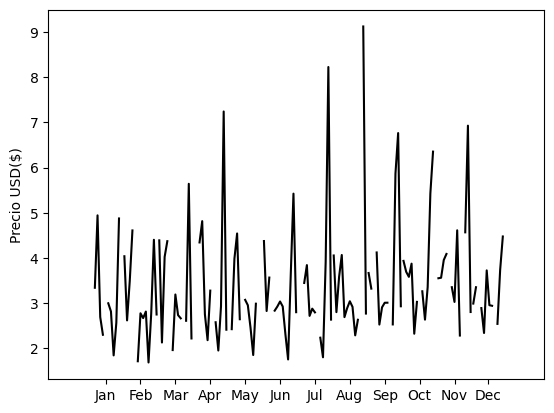

In [28]:
month_plot(hist, ylabel='Precio USD($)')

In [29]:
pd.plotting.scatter_matrix(hist)

AttributeError: 'Series' object has no attribute 'columns'

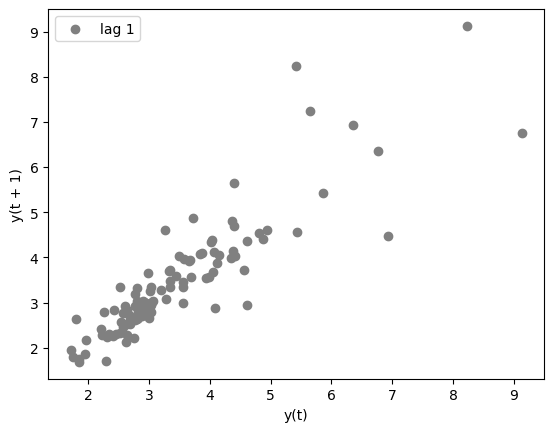

In [30]:
from pandas.plotting import lag_plot
lag_plot(hist, lag=1, c=['grey'], label='lag 1')
plt.legend()

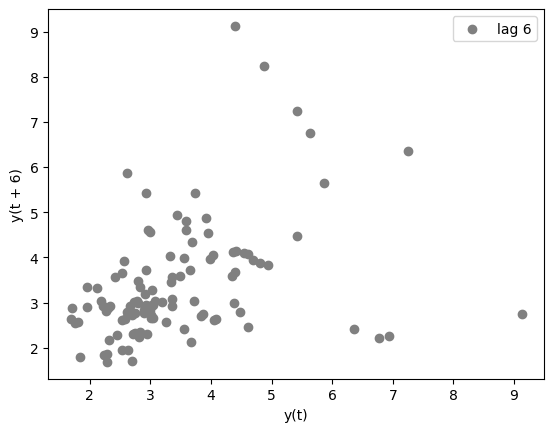

In [31]:
lag_plot(hist, lag=6, c=['grey'], label='lag 6')
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

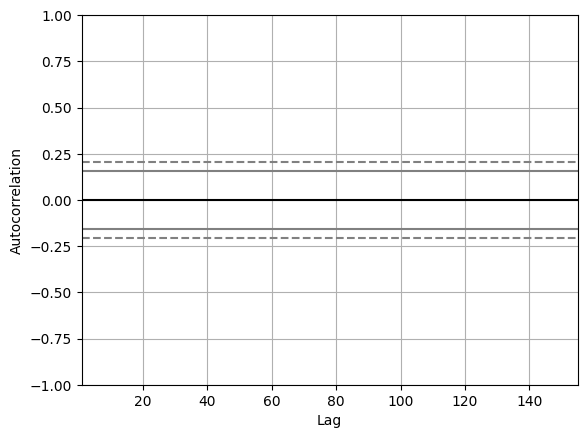

In [32]:
pd.plotting.autocorrelation_plot(hist)

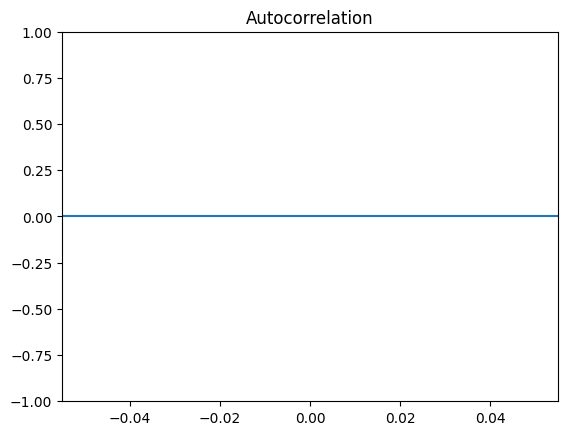

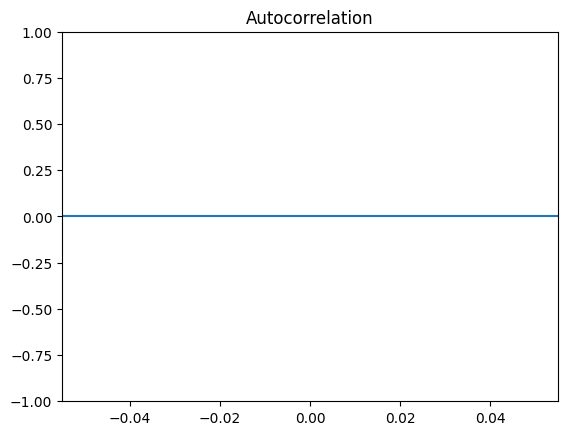

In [34]:
plot_acf(hist, lags=24)

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hist, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

ValueError: This function does not handle missing values

In [38]:
from matplotlib import pyplot
result = seasonal_decompose(hist, model='additive')
result.plot()
pyplot.show()

ValueError: This function does not handle missing values

In [40]:
result = seasonal_decompose(hist, model='multiplicative')
result.plot()
pyplot.show()

ValueError: This function does not handle missing values

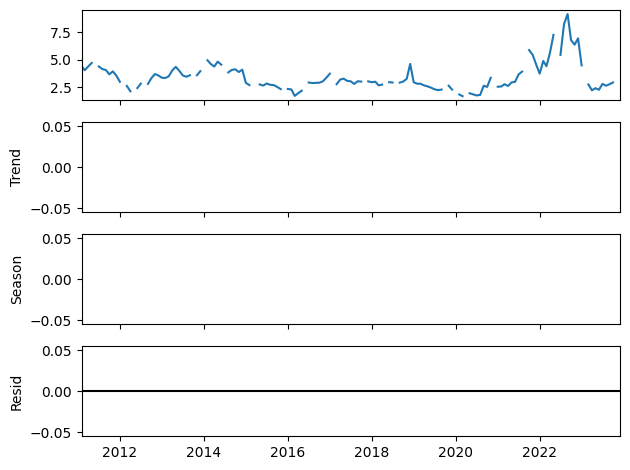

In [41]:
from statsmodels.tsa.seasonal import STL

stl = STL(hist)
res = stl.fit()
fig = res.plot()

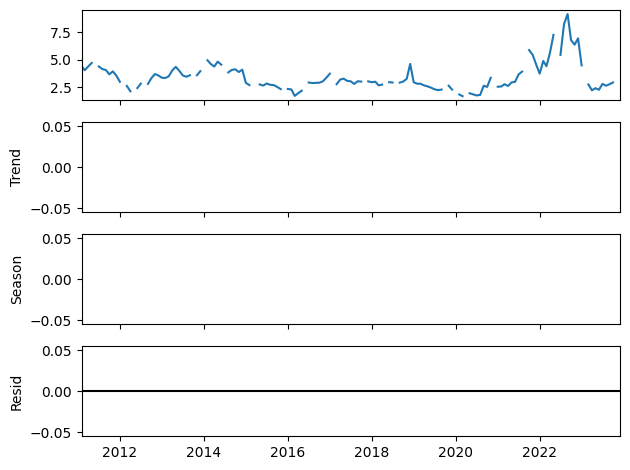

In [42]:
stl = STL(hist, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

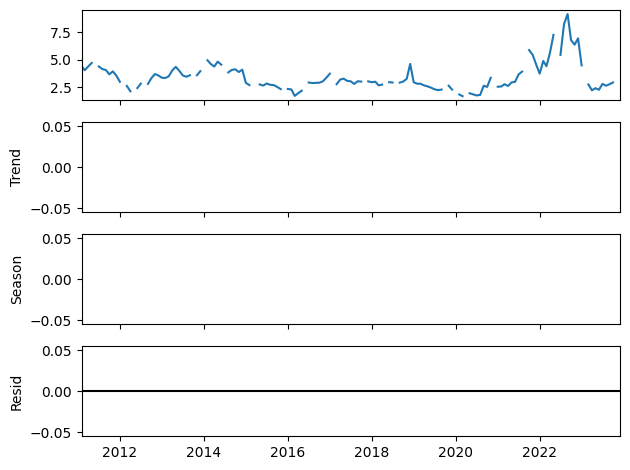

In [43]:
stl = STL(hist, seasonal=5, trend = 13)
res = stl.fit()
fig = res.plot()

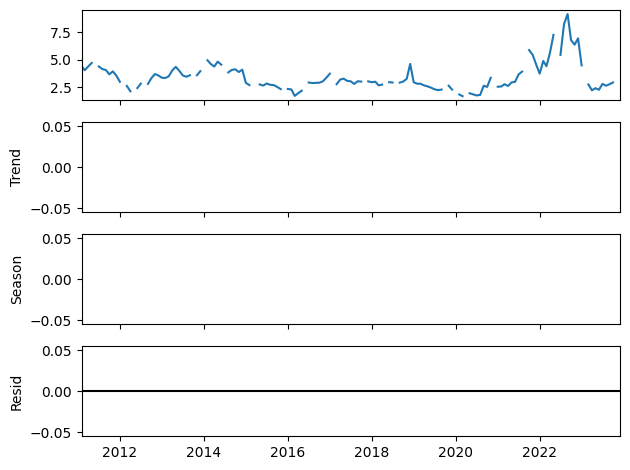

In [44]:
stl = STL(hist, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

In [46]:
hist.describe()

,0
count,132.000000
mean,3.408909
std,1.252870
min,1.684000
25%,2.657000
50%,2.992000
75%,3.961500
max,9.127000


In [47]:
hist.skew()

1.8409061065681347

In [48]:
hist.kurtosis()

4.691017833505018

<Axes: >

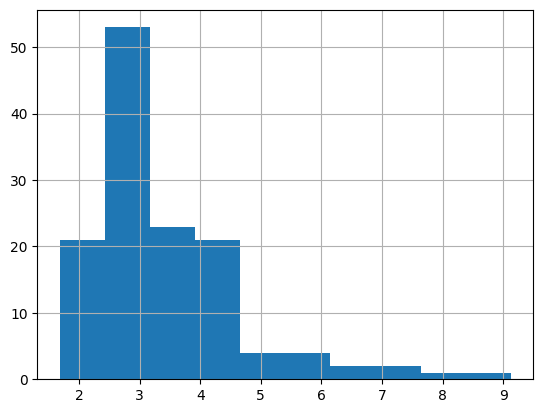

In [49]:
hist.hist()

## **PRONÓSTICOS**

In [50]:
import seaborn as sns
import datetime as dt

In [51]:
hist.head()

,0
2011-01-31,4.420
2011-02-28,4.037
2011-03-31,4.389
2011-04-30,4.698
2011-05-31,NaN


In [52]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.7 MB/s eta 0:00:00


In [54]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = hist.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([nan, nan, nan])}

In [55]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [101]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

**Mean forecast (PROMEDIO)**

In [102]:
_pred_df

,mean_forecast
2024-01-01,2.802
2024-02-01,2.802
2024-03-01,2.802


In [103]:
pd.concat([hist, mean_pred_df])

,0,mean_forecast,naive_forecast
2011-01-31,4.420,NaN,NaN
2011-02-28,4.037,NaN,NaN
2011-03-31,4.389,NaN,NaN
2011-04-30,4.698,NaN,NaN
2011-05-31,NaN,NaN,NaN
...,...,...,...
2023-10-31,NaN,NaN,NaN
2023-11-30,2.802,NaN,NaN
2024-01-01,NaN,2.802,2.802
2024-02-01,NaN,2.802,2.802


In [105]:
frame = pd.concat([hist, _pred_df])
frame.columns = ['Values', 'mean_forecast']

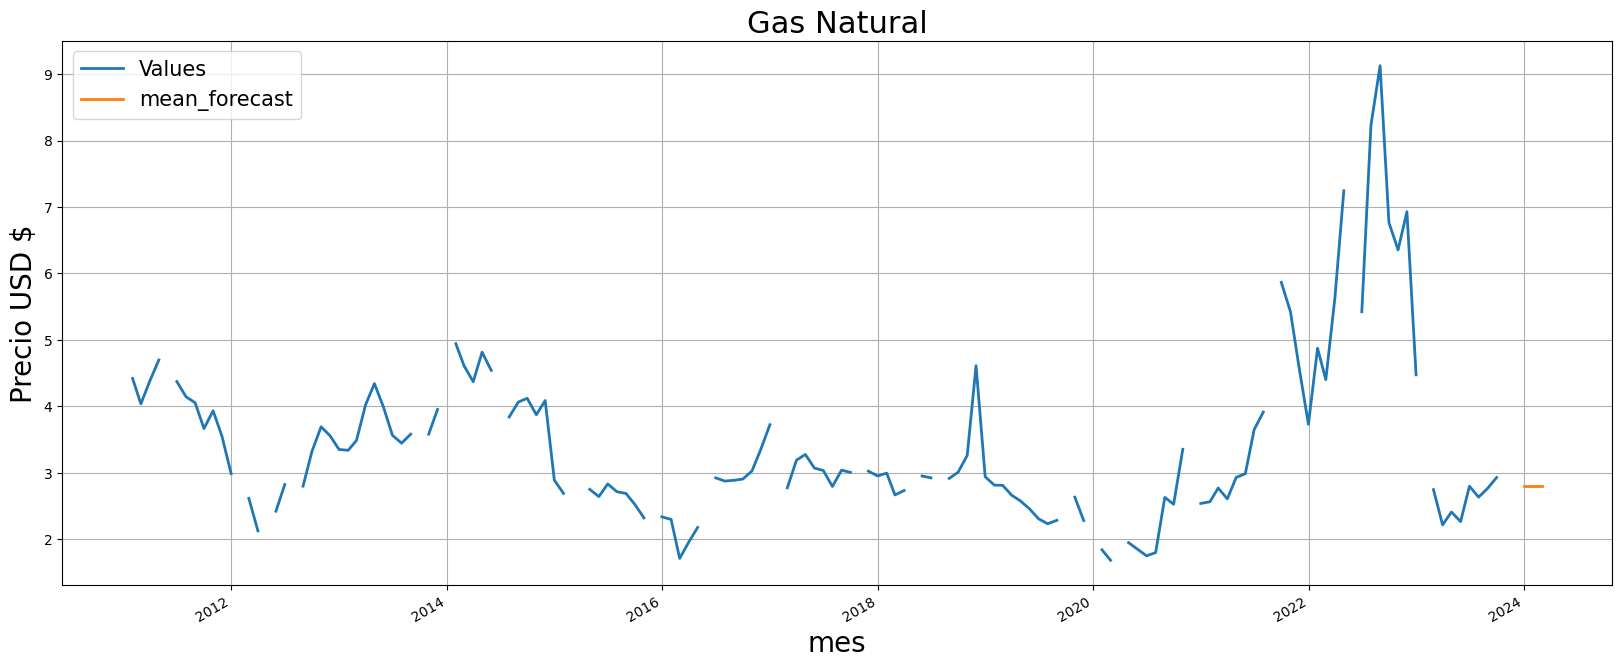

In [107]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist, _pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

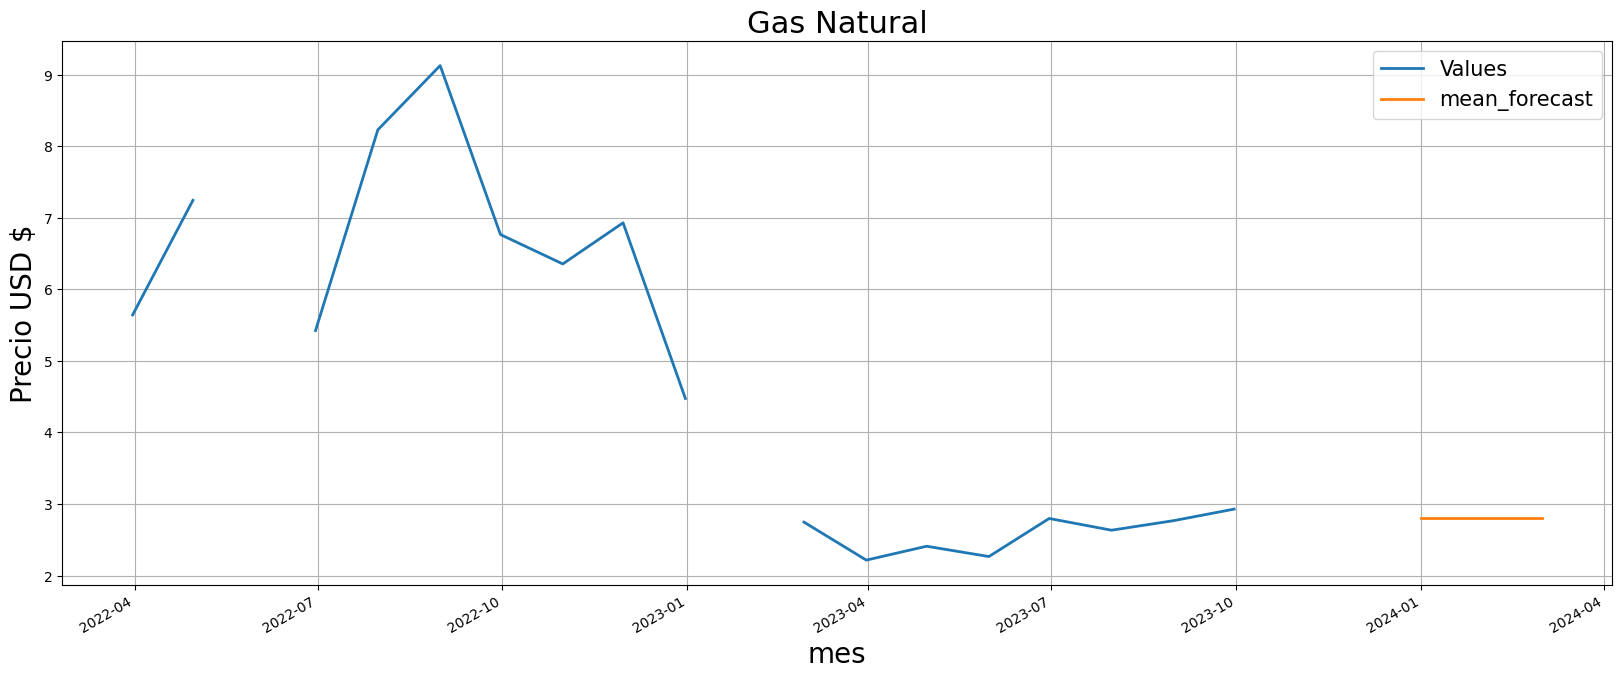

In [108]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist, _pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


**Naïve method**


In [109]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=hist.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([2.80200005, 2.80200005, 2.80200005])}

In [110]:
# Create a column with the values predicted:
_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [111]:
_pred_df

,mean_forecast,naive_forecast
2024-01-01,2.802,2.802
2024-02-01,2.802,2.802
2024-03-01,2.802,2.802


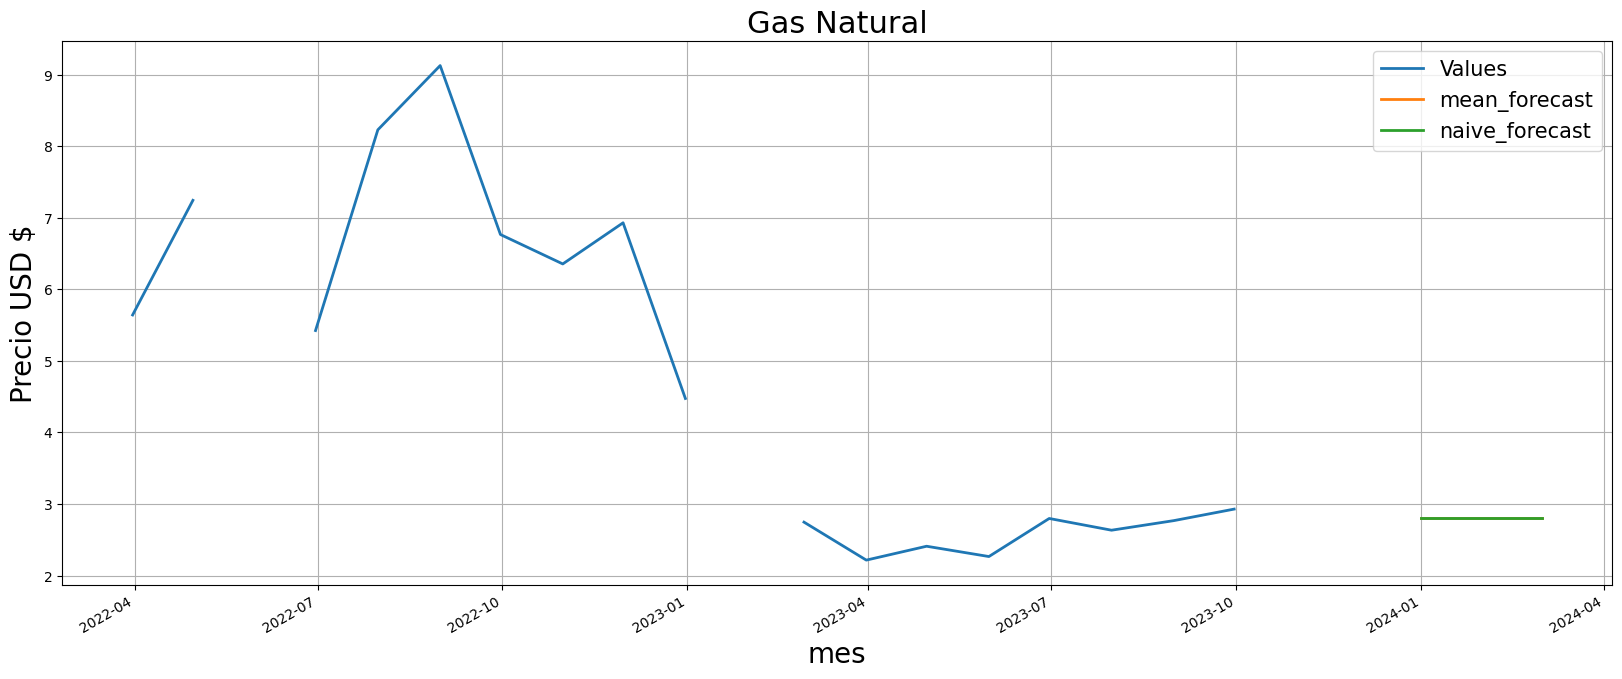

In [112]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Seasonal naïve method**

In [113]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=hist.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([4.4749999 ,        nan, 2.74699998])}

In [114]:
# Create a column with the values predicted:
_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]


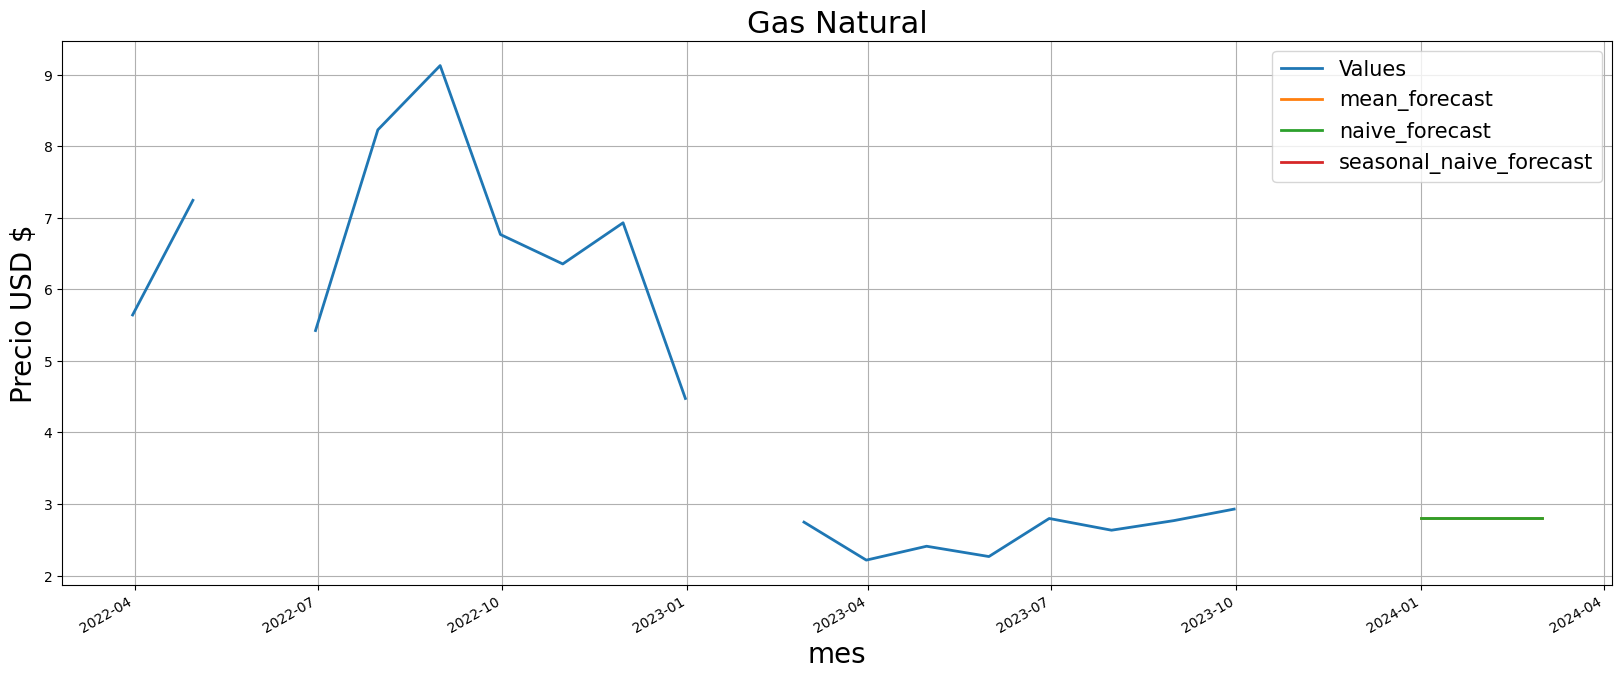

In [116]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Drift method**

In [117]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=hist.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([2.79149355, 2.78098706, 2.77048056])}

In [119]:
# Create a column with the values predicted:
_pred_df["drift_forecast"] = y_hat_dict["mean"]

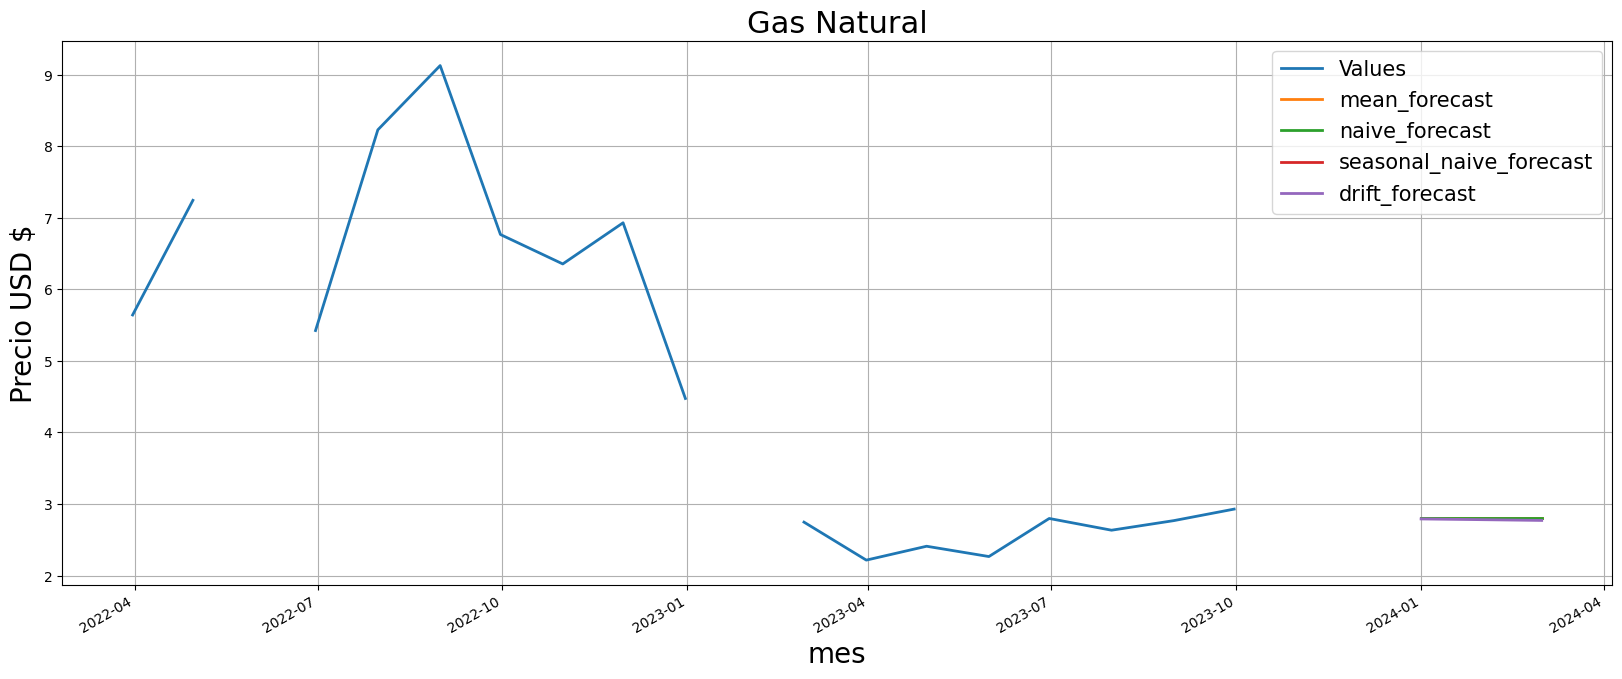

In [120]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Valores ajustados y residuales**


In [121]:
#Import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np

from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

In [122]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=hist.values)
mean = model.predict(h=12)

In [123]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [126]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",hist.index,hist)

In [127]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
2011-01-31,Mean,2011-01-31,4.420,NaN,NaN
2011-02-28,Mean,2011-02-28,4.037,NaN,NaN
2011-03-31,Mean,2011-03-31,4.389,NaN,NaN
2011-04-30,Mean,2011-04-30,4.698,NaN,NaN
2011-05-31,Mean,2011-05-31,NaN,NaN,NaN
...,...,...,...,...,...
2023-07-31,Mean,2023-07-31,2.634,8.229,-5.595
2023-08-31,Mean,2023-08-31,2.768,9.127,-6.359
2023-09-30,Mean,2023-09-30,2.929,6.766,-3.837
2023-10-31,Mean,2023-10-31,NaN,6.355,NaN


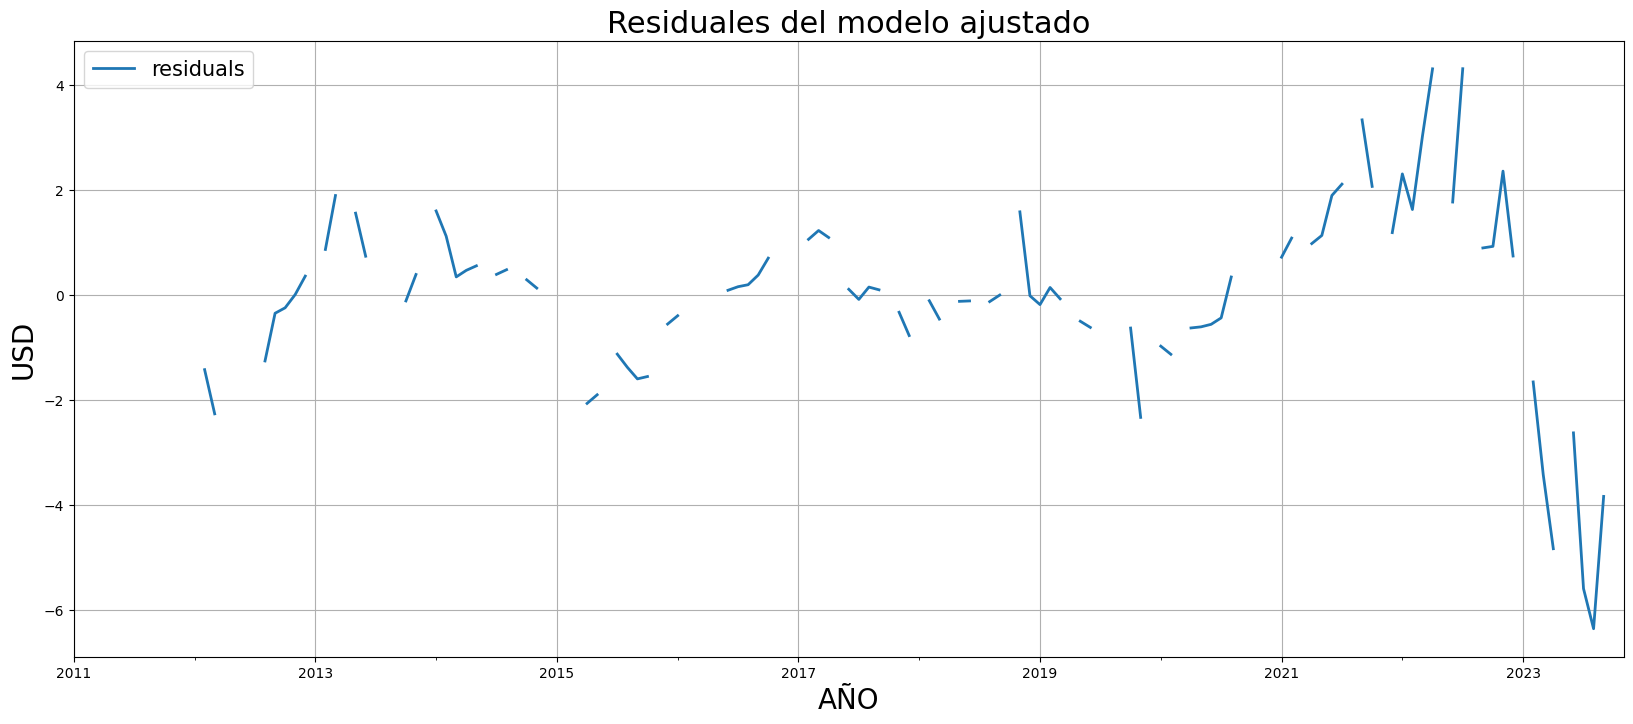

In [128]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado', fontsize=22)
ax.set_ylabel('USD', fontsize=20)
ax.set_xlabel('AÑO', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

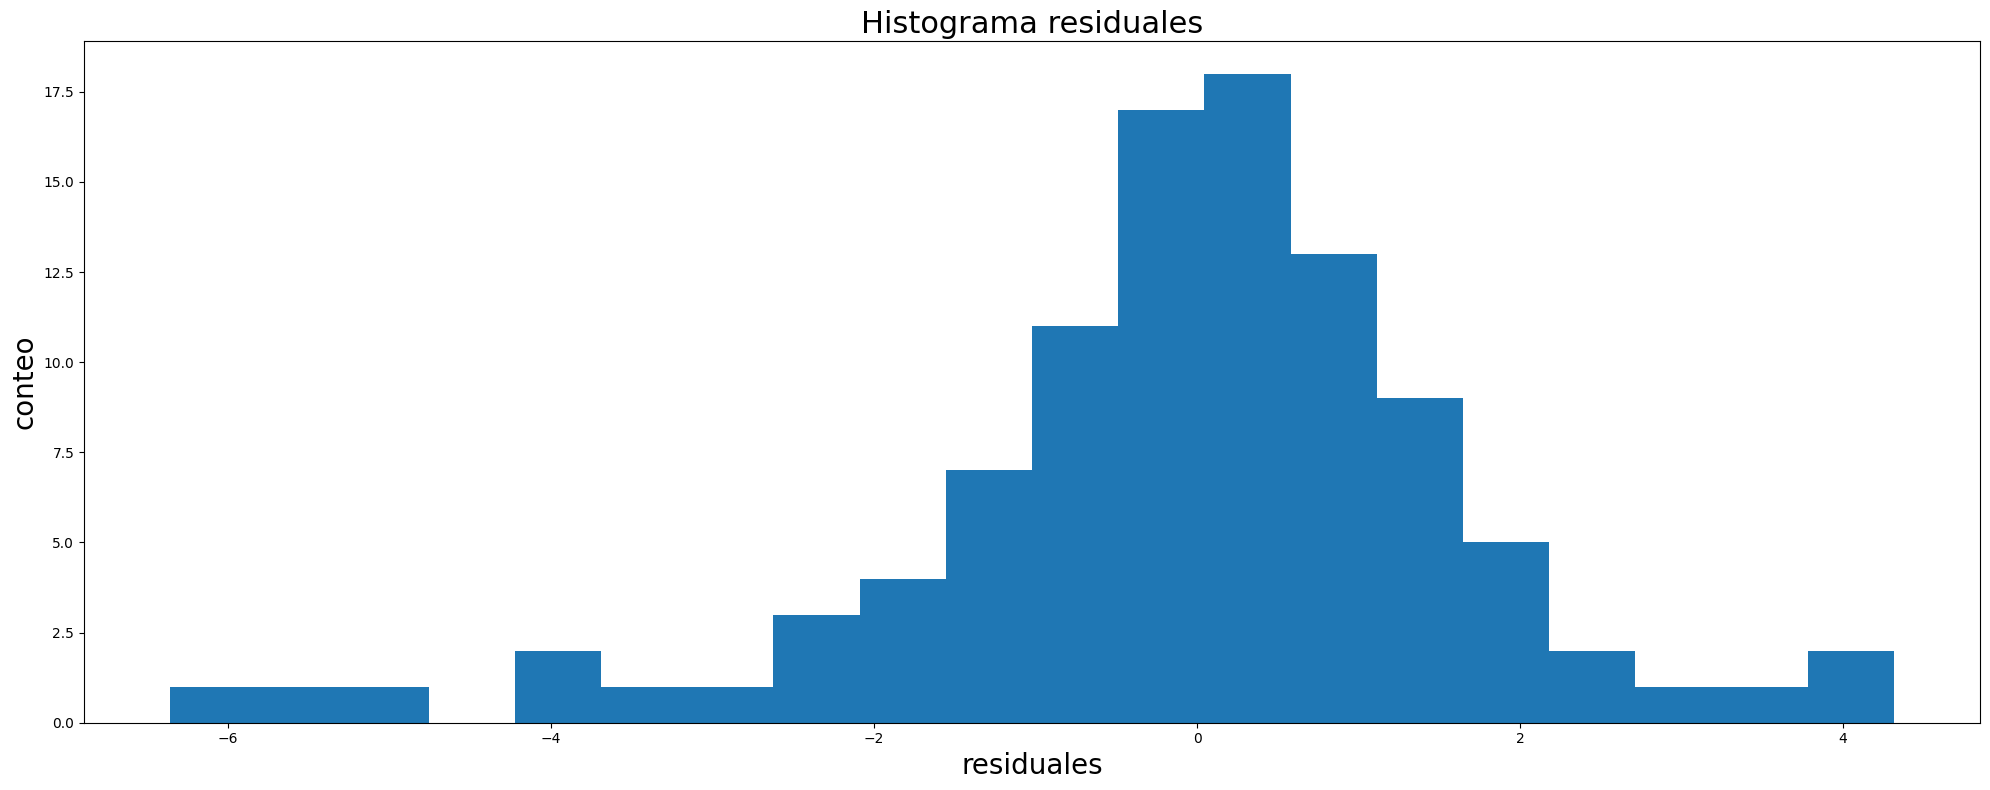

In [129]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('Histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

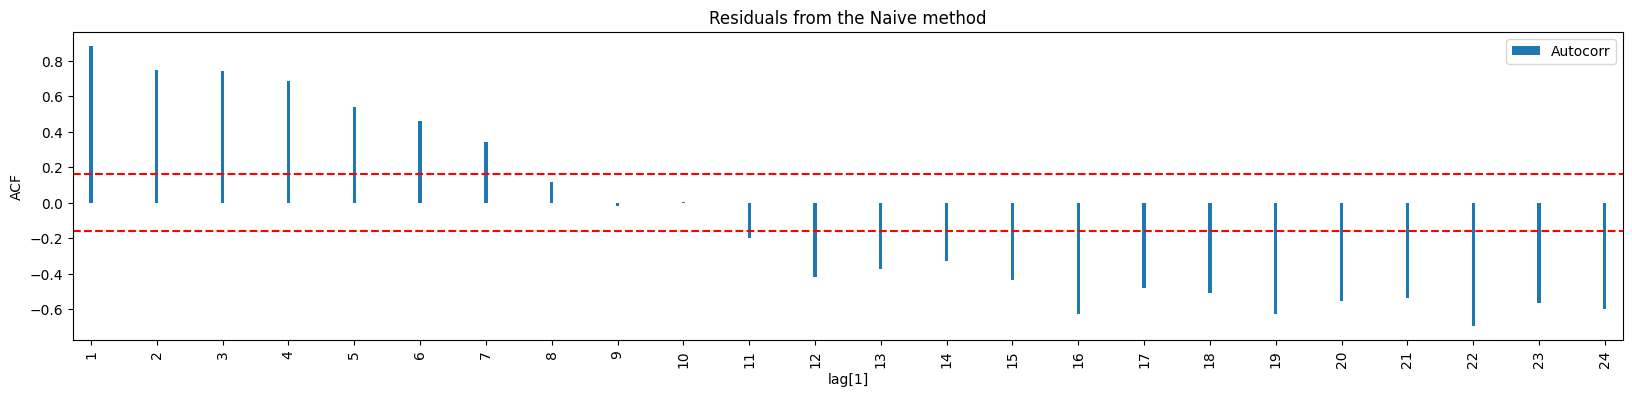

In [130]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

**Model_df**


In [131]:
import statsmodels

In [132]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,74.170422,5.270448e-11


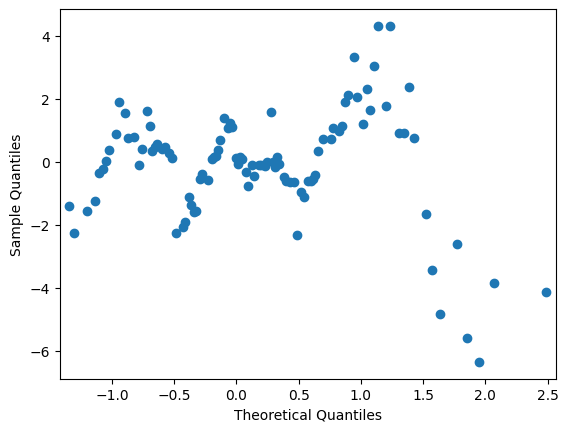

In [133]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

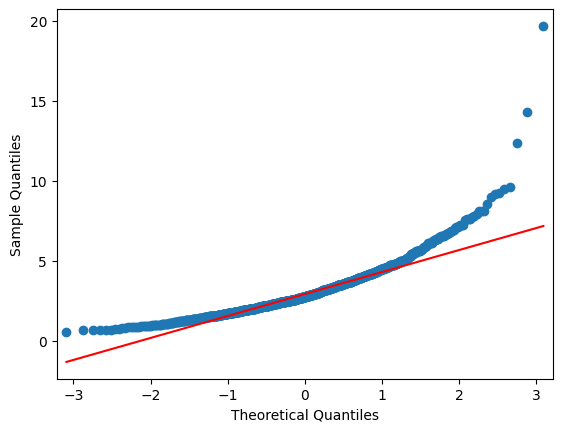

In [134]:
from scipy.stats import lognorm
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = statsmodels.api.qqplot(lognorm_dataset, line='q')

plt.show()

In [141]:
np.random.seed(1)

# Assuming you want to generate random variates with shape 0.5, scale exp(1),
# and location based on the residuals:
loc_values = augment_df[['residuals']].values.flatten()  # Flatten the array

# Generate random variates for each location value
random_variates = [lognorm.rvs(s=.5, loc=loc, scale=math.exp(1), size=1000)
                   for loc in loc_values]

# random_variates will be a list of arrays, where each array contains 1000
# random variates generated with the corresponding location value from the residuals.

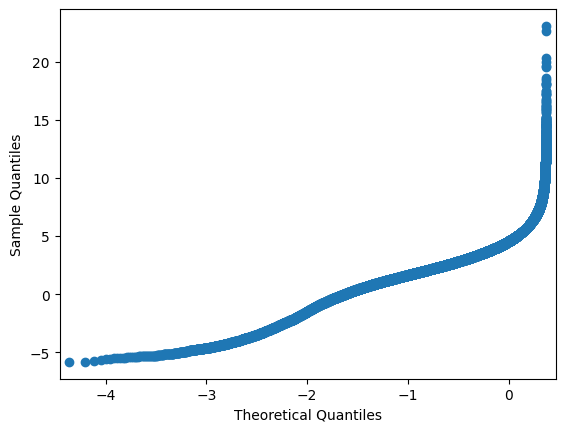

In [144]:
#create Q-Q plot with 45-degree line added to plot
fig = statsmodels.api.qqplot(np.concatenate(random_variates), line='q') # Changed line

plt.show()